# World Happiness Report - Data Analysis Project (Review)

Welcome to this multi-day data analysis project! In this lab, you'll practice data analyst skills using the **World Happiness Report** dataset (https://www.kaggle.com/datasets/unsdsn/world-happiness). You'll go through the entire data analysis workflow: loading the data, cleaning it, exploring it, analyzing correlations, visualizing results, and summarizing insights.

This project is designed for beginners, so we'll guide you with step-by-step instructions and hints. However, try to think critically and attempt each step on your own before revealing any provided solutions. The goal is to help you become comfortable with the data analysis process and with using Python libraries like pandas, matplotlib, and seaborn.

## Step 1: Load and Inspect the Dataset

First, let's load the World Happiness Report dataset and do some initial inspection of the data.
The dataset can be downloaded from Kaggle. Make sure you have the CSV file in your working directory.

**Tasks:**
- Import the necessary libraries (pandas, matplotlib, seaborn).
- Load the dataset into a pandas DataFrame. (Use `pd.read_csv()` and the file name of the dataset.)
- Display the first few rows of the DataFrame to verify it loaded correctly (`DataFrame.head()`).
- Display the shape of the DataFrame (number of rows and columns) to understand the dataset size.
- (Optional) Display basic info about the DataFrame (`DataFrame.info()`) to see the data types and non-null counts.


In [81]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Note: replace 'PATH/TO/DATAFILE.csv' with the actual filename (e.g., 'world_happiness.csv' or '2019.csv').
# For example, if the file is named 'world_happiness.csv':
# happiness_df = pd.read_csv('world_happiness.csv')
happiness_df = pd.read_csv('2015.csv')

# Inspect the first few rows
happiness_df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [82]:
# Check the size of the DataFrame (rows, columns)
happiness_df.shape

# (Optional) view DataFrame info
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

## Step 2: Data Cleaning

Now that the data is loaded, it's time to clean it if necessary. Data cleaning ensures that our dataset is ready for analysis (no missing or inconsistent values, etc.).

**Tasks:**
- Check for missing values in the dataset.
  - Use functions like `isnull().sum()` to see if any columns have missing entries.
- If there are missing values, decide how to handle them. (For example, you might drop rows or fill them with an appropriate value.)
- Check for duplicate rows in the dataset and remove them if any.
- Make sure the columns have appropriate data types (for example, numerical columns should be `int` or `float`, not strings).
- (Optional) If the dataset contains multiple years or if you have separate data files per year, you might combine them into one DataFrame and add a `Year` column. (This is an advanced step; only do this if you want to analyze trends over time.)

**Hint:** The World Happiness Report data is usually pretty clean. But it's always good to verify! If there's a column like `Country or region` and another like `Country` in different files, you may want to rename columns for consistency before combining data.

In [83]:
# Check for missing values in each column
happiness_df.isnull().sum()

# If missing values are present, handle them (e.g., drop or fill).
# Example: to drop rows with any missing values, you could do:
# happiness_df = happiness_df.dropna()

# Check for duplicate rows
duplicate_count = happiness_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
# If duplicates exist, you can remove them:
# happiness_df = happiness_df.drop_duplicates()

# (Optional) If needed, convert data types or rename columns for consistency.
# For example, if a column name has spaces or inconsistent naming across years, you might:
# happiness_df.rename(columns={'Country or region': 'Country'}, inplace=True)

Number of duplicate rows: 0


## Step 3: Exploratory Data Analysis (EDA)

Now, let's explore the data to understand the distributions and relationships within it. In this step, you'll compute summary statistics and answer some initial questions about the data.

**Tasks:**
- Calculate basic statistical measures for the numeric columns (e.g., using `DataFrame.describe()`). This gives you the mean, min, max, etc., for each factor.
- Identify the range of happiness scores. What is the minimum and maximum happiness score? Which countries have these scores?
- Find out how many unique countries (and, if applicable, regions) are in the dataset.
- Determine the happiest and least happy countries in the data (top 5 and bottom 5 by happiness score).
- (If your data spans multiple years) figure out how many years are covered and which year had the highest average happiness score.

Try to answer these questions using pandas operations. For example, you might sort the DataFrame by the happiness score, or use functions like `idxmax()` to find the index of the max value in a column.

In [84]:
# Summary statistics for numeric columns
happiness_df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [85]:
# Find the country with the maximum happiness score
max_score = happiness_df['Happiness Score'].max()
max_score_country = happiness_df.loc[happiness_df['Happiness Score'].idxmax(), 'Country']
print(f"Highest Happiness Score: {max_score} (Country: {max_score_country})")

# Find the country with the minimum happiness score
min_score = happiness_df['Happiness Score'].min()
min_score_country = happiness_df.loc[happiness_df['Happiness Score'].idxmin(), 'Country']
print(f"Lowest Happiness Score: {min_score} (Country: {min_score_country})")

Highest Happiness Score: 7.587 (Country: Switzerland)
Lowest Happiness Score: 2.839 (Country: Togo)


In [95]:
# List of top 5 happiest countries
happiest_countries = happiness_df.sort_values('Happiness Score', ascending=False).head(5)
print("Top 5 happiest countries:")
happiest_countries

Top 5 happiest countries:


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [96]:
# List of bottom 5 least happy countries
least_happy_countries = happiness_df.sort_values('Happiness Score', ascending=True).head(5)
print("\nBottom 5 least happy countries:")
least_happy_countries


Bottom 5 least happy countries:


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042


In [87]:
# (Optional) If a 'Region' column exists, you can explore average happiness by region:
if 'Region' in happiness_df.columns:
    region_group = happiness_df.groupby('Region')['Happiness Score'].mean().sort_values(ascending=False)
    print("\nAverage Happiness Score by Region:\n", region_group)

# (Optional) If data includes multiple years, you can explore trends over years:
if 'Year' in happiness_df.columns:
    year_group = happiness_df.groupby('Year')['Happiness Score'].mean().sort_values(ascending=False)
    print("\nAverage Happiness Score by Year:\n", year_group)


Average Happiness Score by Region:
 Region
Australia and New Zealand          7.285000
North America                      7.273000
Western Europe                     6.689619
Latin America and Caribbean        6.144682
Eastern Asia                       5.626167
Middle East and Northern Africa    5.406900
Central and Eastern Europe         5.332931
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Name: Happiness Score, dtype: float64


## Step 4: Correlation Analysis

Next, let's examine the relationships between different factors and happiness. We'll calculate the correlation between the happiness score and other variables (GDP, social support, etc.), as well as correlations among all numerical factors.

**Tasks:**
- Compute the correlation matrix for the numerical columns in the dataset (pandas `DataFrame.corr()` can be used).
- Identify which factors have the strongest positive or negative correlation with the happiness score. Consider what these correlations mean.
- Based on the correlations, which factors seem most important in contributing to happiness?
- Create a heatmap using seaborn to visualize the correlation matrix. This will make it easier to see which variables are strongly or weakly correlated.

**Hint:** A correlation value ranges from -1 to 1. Values close to 1 indicate a strong positive correlation (when one goes up, the other goes up), whereas values close to -1 indicate a strong negative correlation (when one goes up, the other goes down). Values near 0 mean no strong linear correlation.

In [88]:
# Compute correlation matrix for numerical columns
corr_matrix = happiness_df.corr(numeric_only=True)
corr_matrix

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


Correlation of each factor with Happiness Score:
 Economy (GDP per Capita)         0.780966
Family                           0.740605
Health (Life Expectancy)         0.724200
Freedom                          0.568211
Dystopia Residual                0.530474
Trust (Government Corruption)    0.395199
Generosity                       0.180319
Standard Error                  -0.177254
Happiness Rank                  -0.992105
Name: Happiness Score, dtype: float64 



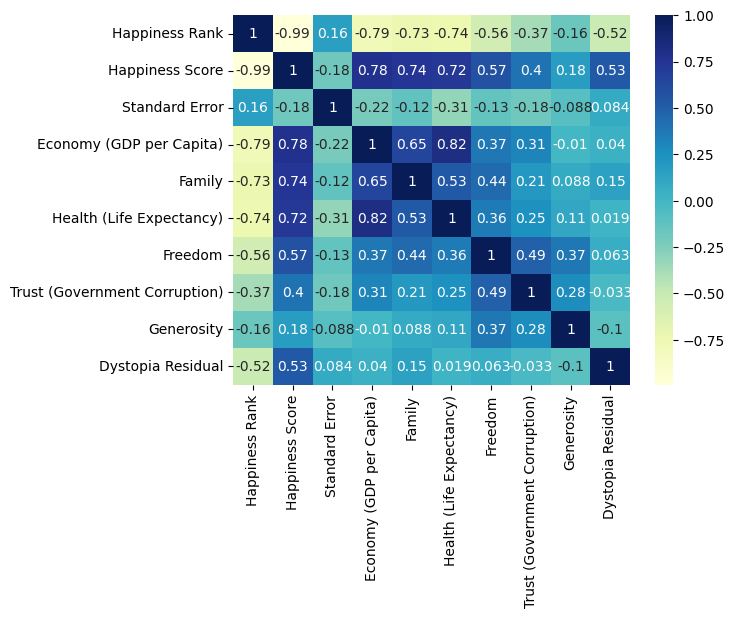

In [89]:
# Identify the correlations of each factor with the Happiness Score
# (excluding the Score correlating with itself which is always 1)
score_corr = corr_matrix['Happiness Score'].sort_values(ascending=False)
print("Correlation of each factor with Happiness Score:\n", score_corr[1:], "\n")  # [1:] to skip the first entry which is Score with itself

# TODO: Visualize the correlation matrix with a heatmap for easier interpretation.
# HINT: You can use sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu') to create a heatmap.
# (Don't forget to plt.show() to display it.)
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()

## Step 5: Data Visualization

Now it's time to create some visualizations to further explore the data and present findings. Visualizing data can reveal patterns that aren't obvious from tables alone.

**Tasks:**
- Create a bar chart showing the top 10 happiest countries and their happiness scores.
- (Optional) Create a bar chart for the bottom 10 (least happy) countries.
- Plot a histogram or distribution plot of the happiness scores to see how scores are distributed across countries.
- Create a scatter plot to examine the relationship between two factors and the happiness score. For example, plot GDP per capita vs. Happiness Score, or Social Support vs. Happiness Score.
- (Optional) If a region column is available, create a chart (like a bar plot) showing the average happiness score for each region.

Use matplotlib or seaborn for these plots. Remember to add labels and titles to make the charts understandable.

**Hint:** For the bar charts, you can sort the data by score and use `sns.barplot`. For the scatter plot, try `sns.scatterplot`. Use `plt.hist` or `sns.histplot` for the distribution of scores. Always label your axes and add a title!

<ipython-input-90-1b7cad0ccbef>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Happiness Score', y='Country', data=top10, palette='Blues_r')


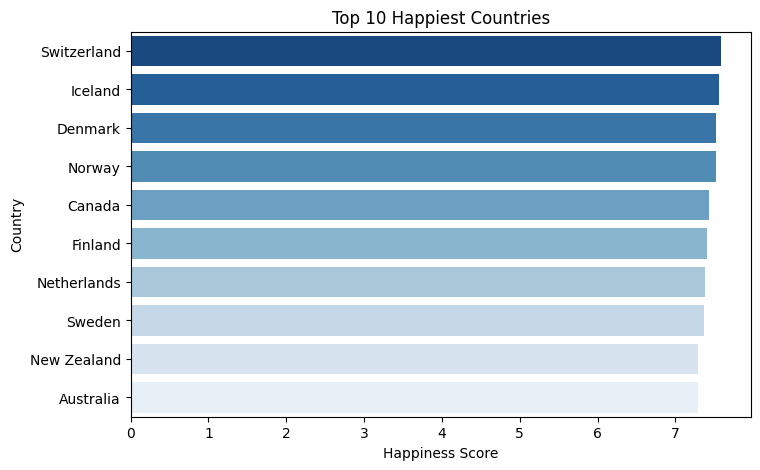

<ipython-input-90-1b7cad0ccbef>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Happiness Score', y='Country', data=bottom10, palette='Blues_r')


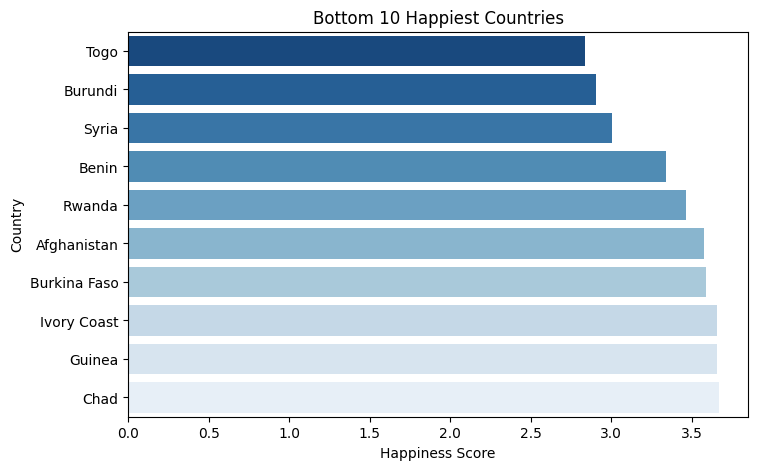

In [90]:
# Bar chart of top 10 happiest countries
top10 = happiness_df.sort_values('Happiness Score', ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x='Happiness Score', y='Country', data=top10, palette='Blues_r')
plt.title('Top 10 Happiest Countries')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()

# TODO: Similarly, you can create a bar chart for the bottom 10 countries.
bottom10 = happiness_df.sort_values('Happiness Score', ascending=True).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x='Happiness Score', y='Country', data=bottom10, palette='Blues_r')
plt.title('Bottom 10 Happiest Countries')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()


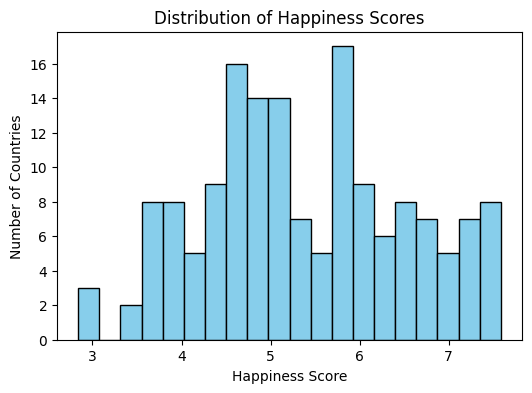

In [91]:
# Histogram of Happiness Scores
plt.figure(figsize=(6,4))
plt.hist(happiness_df['Happiness Score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Number of Countries')
plt.show()

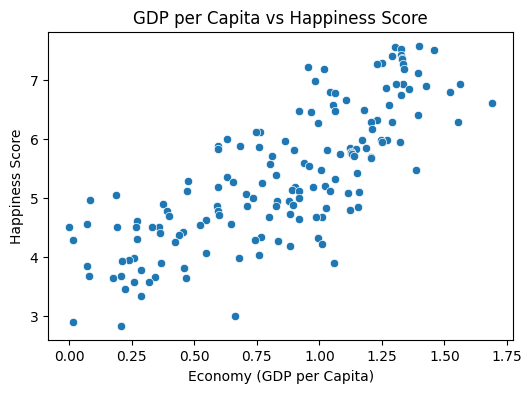

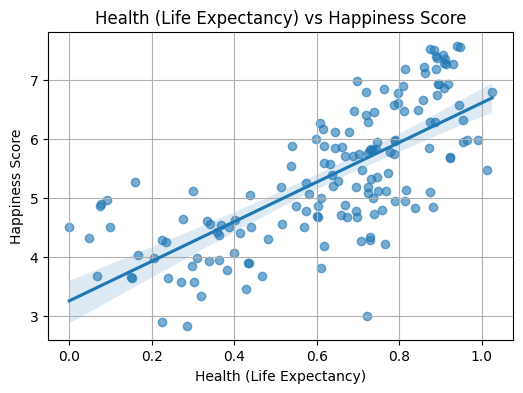

In [92]:
# Scatter plot: GDP per Capita vs Happiness Score (as an example)
# Replace 'GDP per Capita' with the exact column name in your dataset for GDP.
plt.figure(figsize=(6,4))
sns.scatterplot(x='Economy (GDP per Capita)', y='Happiness Score', data=happiness_df)
plt.title('GDP per Capita vs Happiness Score')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness Score')
plt.show()

# TODO: Try other scatter plots:
# e.g., Social support vs Happiness Score, Life Expectancy vs Happiness Score, etc.
# You can also use sns.regplot to add a regression line for trend.
plt.figure(figsize=(6, 4))
sns.regplot(x='Health (Life Expectancy)', y='Happiness Score', data=happiness_df, scatter_kws={'alpha': 0.6})
plt.title('Health (Life Expectancy) vs Happiness Score')
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.show()

## Step 6: Interpret and Report Findings

You've now explored the data through various analyses and visualizations. The final step is to summarize your findings.

**Tasks:**
- Write a short summary of the insights you've gained from the analysis. Consider the following:
  - Which countries are the happiest and which are the least happy? Are there any common characteristics among the top or bottom countries?
  - What factors seem most strongly associated with happiness (from the correlation analysis)? Do richer countries tend to be happier? How about the influence of life expectancy, freedom, etc.?
  - If you looked at multiple years, have happiness scores changed over time or remained relatively stable? Any notable trends or events that might explain changes?
  - Any surprising findings or does the data largely fit expectations?
- Make sure to reference your figures in your discussion (for example, "As shown in the scatter plot of GDP vs Happiness, there is a positive correlation between wealth and happiness..."). Include the charts or results from earlier as needed to support your points.

This summary can be written in Markdown below, as if you were writing a report. Be clear and concise, and imagine you are explaining your findings to someone who is not familiar with the data. Use bullet points or bold text for emphasis where appropriate.

*After completing your report, you have finished the project! Feel free to explore further or try additional questions with the data.*

### Summary

- **Top 5 Happiest Countries:**  
  Switzerland, Iceland, Denmark, Norway, and Canada rank highest in happiness. These countries are located in Western Europe or North America, with higher Economy (GDP per Capita) and Health (Life Expectancy), which indicates that they typically enjoy strong economies, high-quality healthcare, and robust social support systems.

- **Bottom 5 Least Happy Countries:**  
  Togo, Burundi, Syria, Benin, and Rwanda are among the least happy countries. with lower Economy (GDP per Capita) and Health (Life Expectancy), which indicates that these nations often face significant economic hardship, low-quality healthcare impacting overall well-being.

- **Key Factors Associated with Happiness:**  
  Correlation analysis revealed that the following factors are most strongly associated with higher happiness scores:
  - **GDP per Capita (Economy):** Wealthier countries tend to report higher happiness.
  - **Family:** Strong relationships and social connections contribute positively to happiness.
  - **Life Expectancy (Health):** Longer life expectancy is linked to greater life satisfaction.

- **Overall Insight:**  
  The data confirm the common belief that economic prosperity, good health, and strong social ties are major contributors to happiness. There is a clear gap between wealthier regions and those facing social or economic challenges.
